In [ ]:
#Final Group Project
#Course Title: Artificial Intelligence Lab
#Course Code: CSE 422
print("Student Name: Md. Jamil Khan")
print("ID : 212-115-009")
#Batch : 54
print("Student Name: Tonway Deb Nath")
print("ID : 212-115-006")




Student Name: Md. Jamil Khan
ID : 212-115-009
Student Name: Tonway Deb Nath
ID : 212-115-006


In [ ]:
!pip install catboost dask[dataframe] xgboost lightgbm seaborn matplotlib scikit-learn imbalanced-learn statsmodels scipy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, VotingClassifier)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc, confusion_matrix)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact


In [ ]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
print("Dataset Loaded: ")
print(df.head())


Dataset Loaded: 
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [ ]:
print("Step 4: Handling Missing/Null Values")
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # Numerical
        if df[column].skew() > 1:  # Outliers exist
            df[column] = df[column].fillna(df[column].median())
        else:
            df[column] = df[column].fillna(df[column].mean())

print("Null values handled:")
print(df.isnull().sum())


Step 4: Handling Missing/Null Values
Null values handled:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


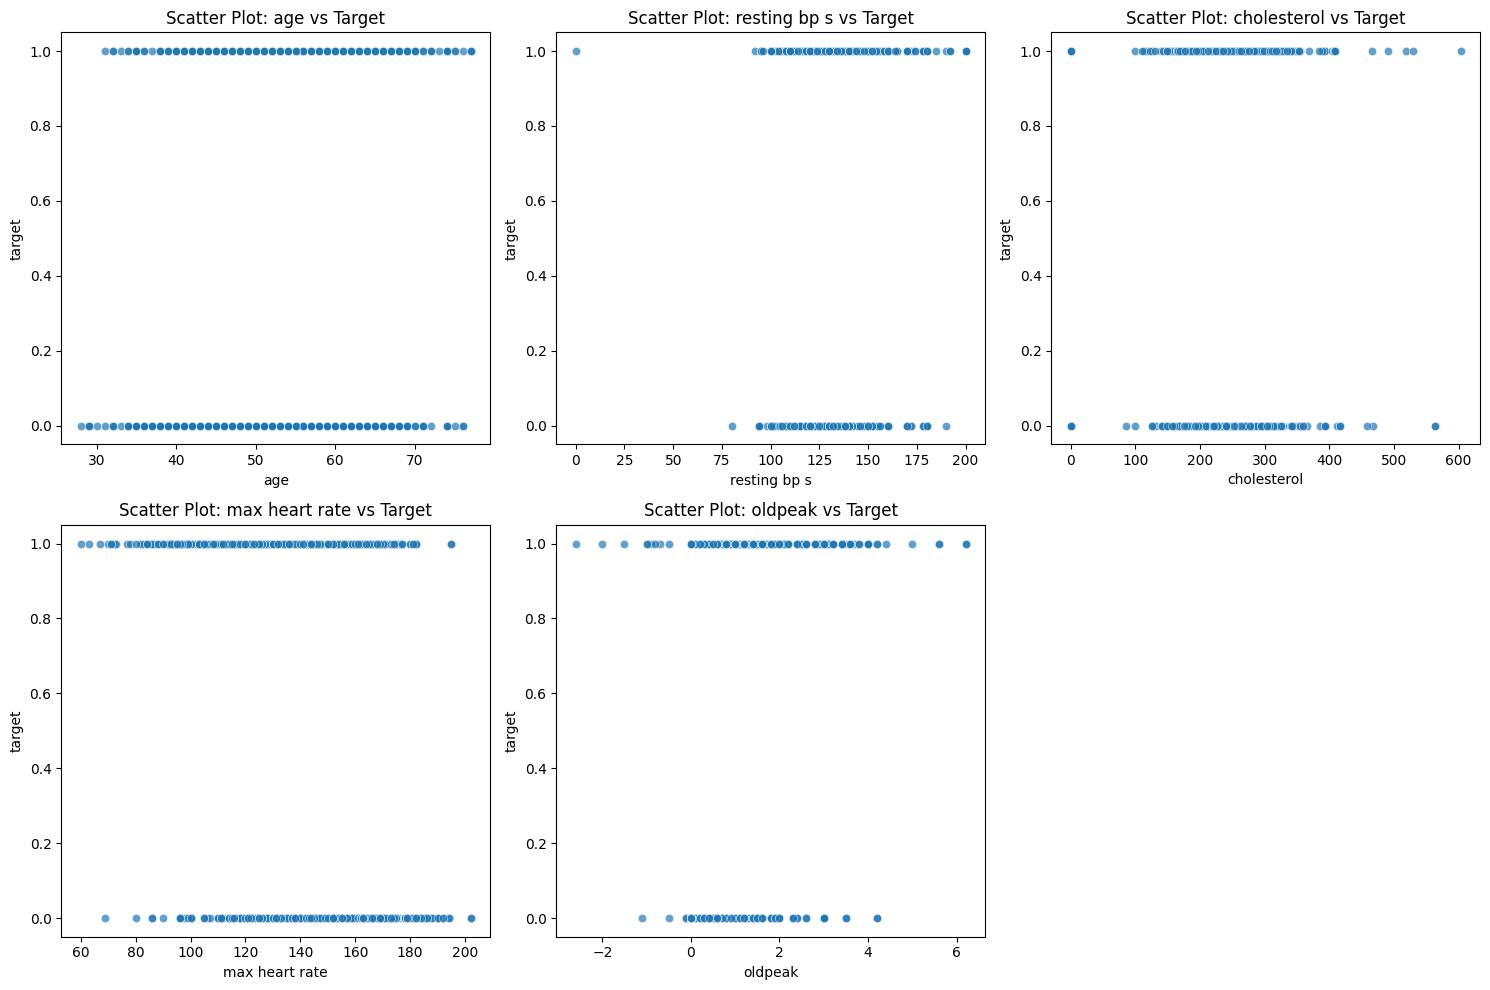

In [ ]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='target', alpha=0.7)
    plt.title(f'Scatter Plot: {feature} vs Target')
plt.tight_layout()
plt.show()

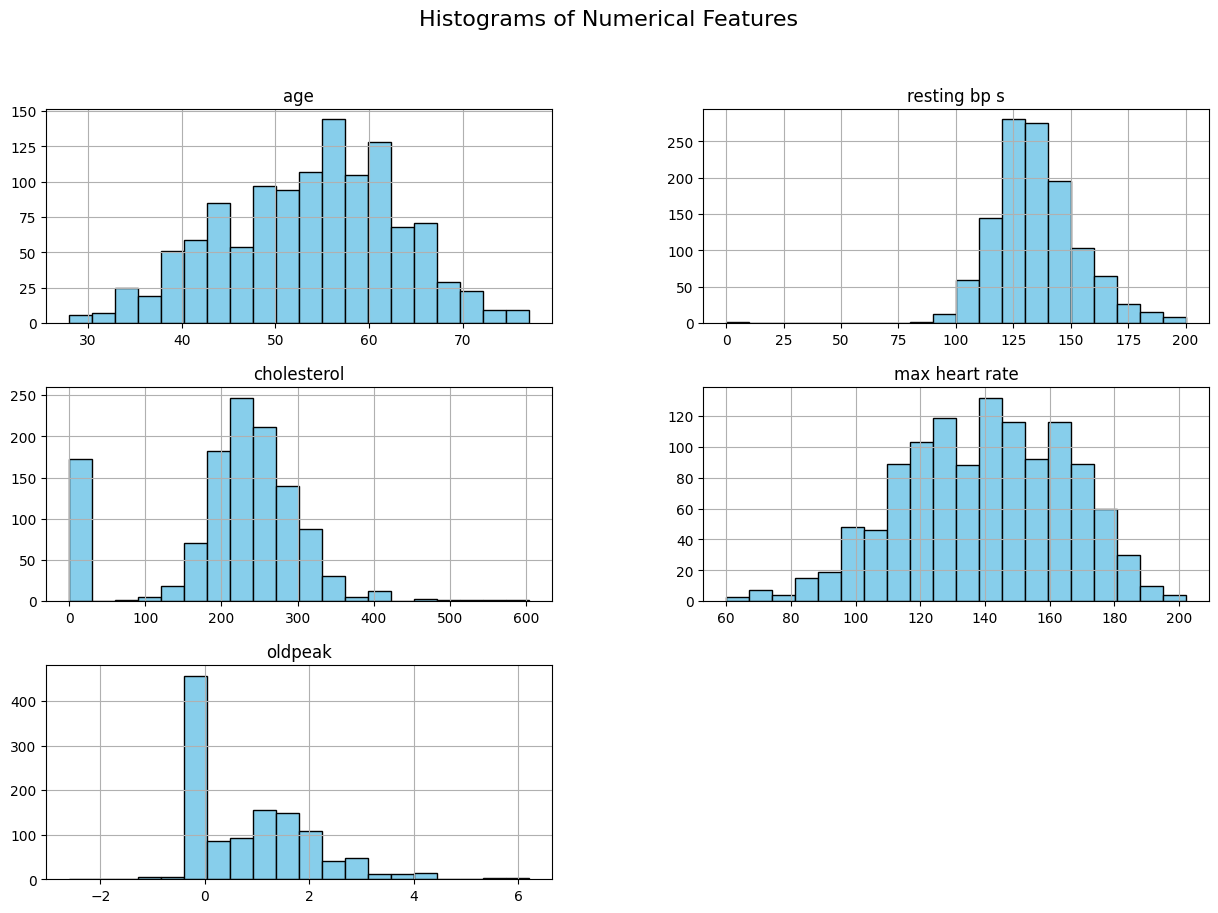

In [ ]:
df[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

<ipython-input-13-a729abbcaf5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-13-a729abbcaf5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-13-a729abbcaf5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-13-a729abbcaf5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

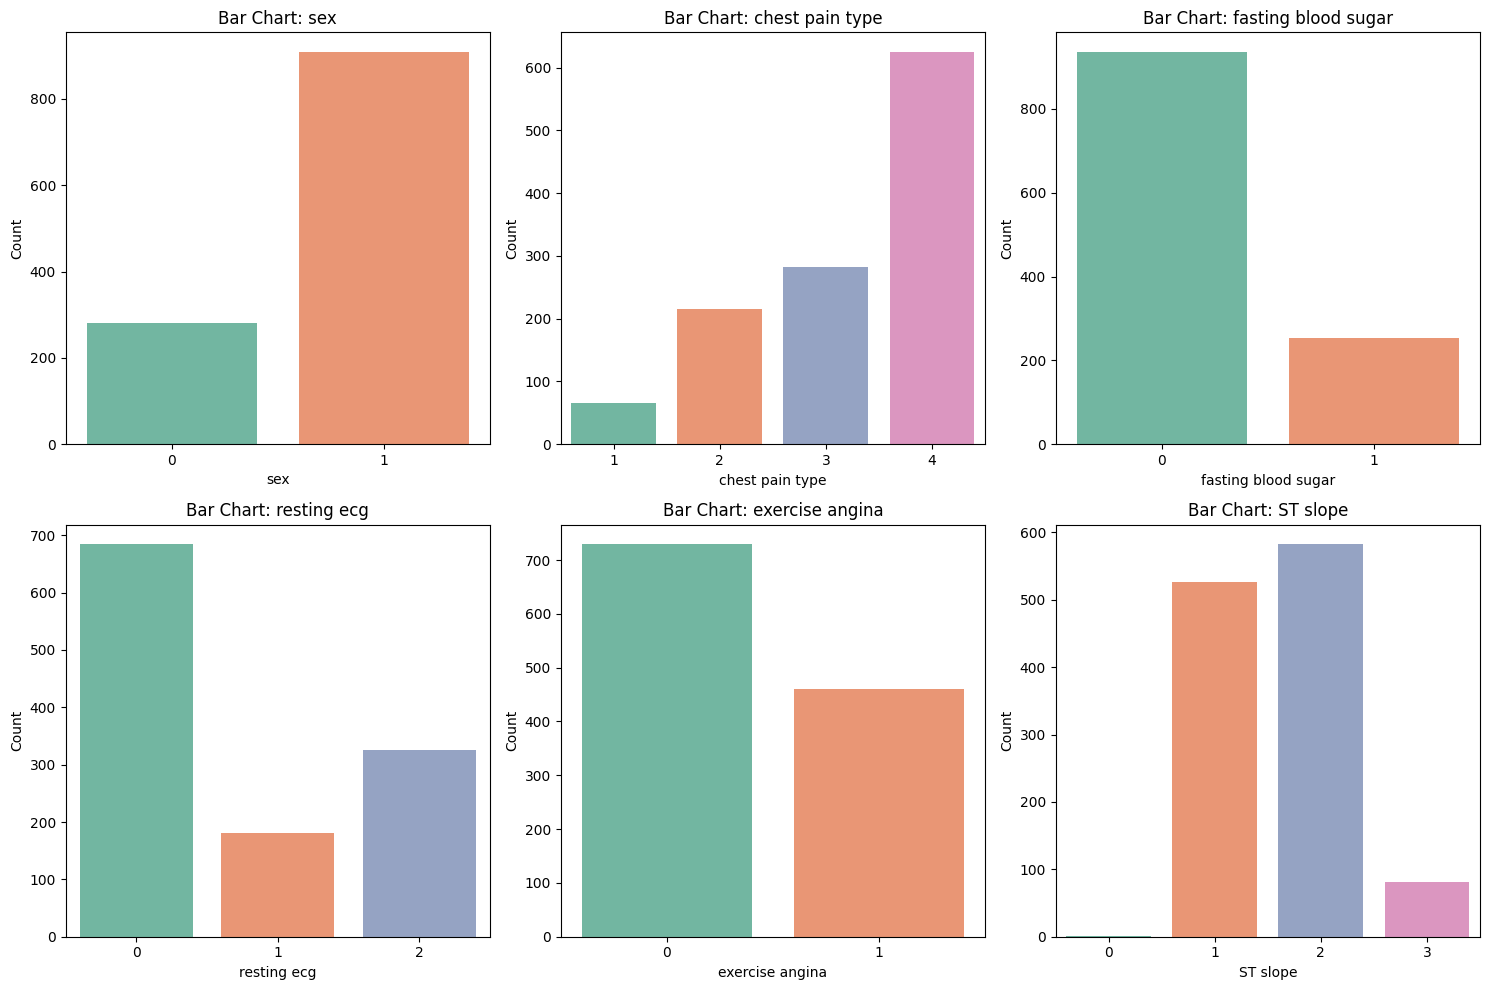

In [ ]:
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Bar Chart: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

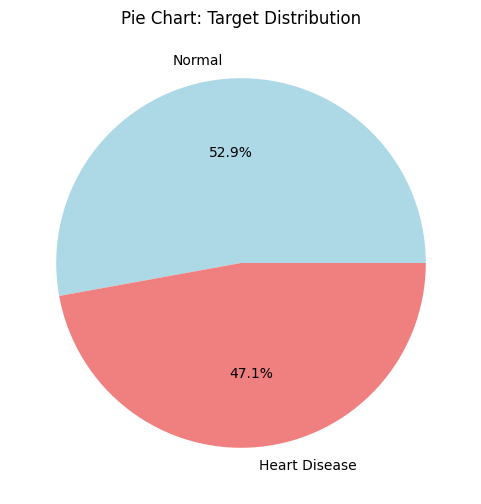

In [ ]:
plt.figure(figsize=(6, 6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=['Normal', 'Heart Disease'])
plt.title('Pie Chart: Target Distribution')
plt.ylabel('')
plt.show()

In [ ]:
label_encoder = LabelEncoder()

df['resting ecg'] = label_encoder.fit_transform(df['resting ecg'])
df['chest pain type'] = label_encoder.fit_transform(df['chest pain type'])
df['ST slope'] = label_encoder.fit_transform(df['ST slope'])
df['fasting blood sugar'] = label_encoder.fit_transform(df['fasting blood sugar'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['exercise angina'] = label_encoder.fit_transform(df['exercise angina'])

print("Label Encoding Completed for categorical features:")
print(df[['resting ecg', 'chest pain type', 'ST slope', 'fasting blood sugar', 'sex', 'exercise angina']].head())


Label Encoding Completed for categorical features:
   resting ecg  chest pain type  ST slope  fasting blood sugar  sex  \
0            0                1         1                    0    1   
1            0                2         2                    0    0   
2            1                1         1                    0    1   
3            0                3         2                    0    0   
4            0                2         1                    0    1   

   exercise angina  
0                0  
1                0  
2                0  
3                1  
4                0  


Performing Pairplot EDA


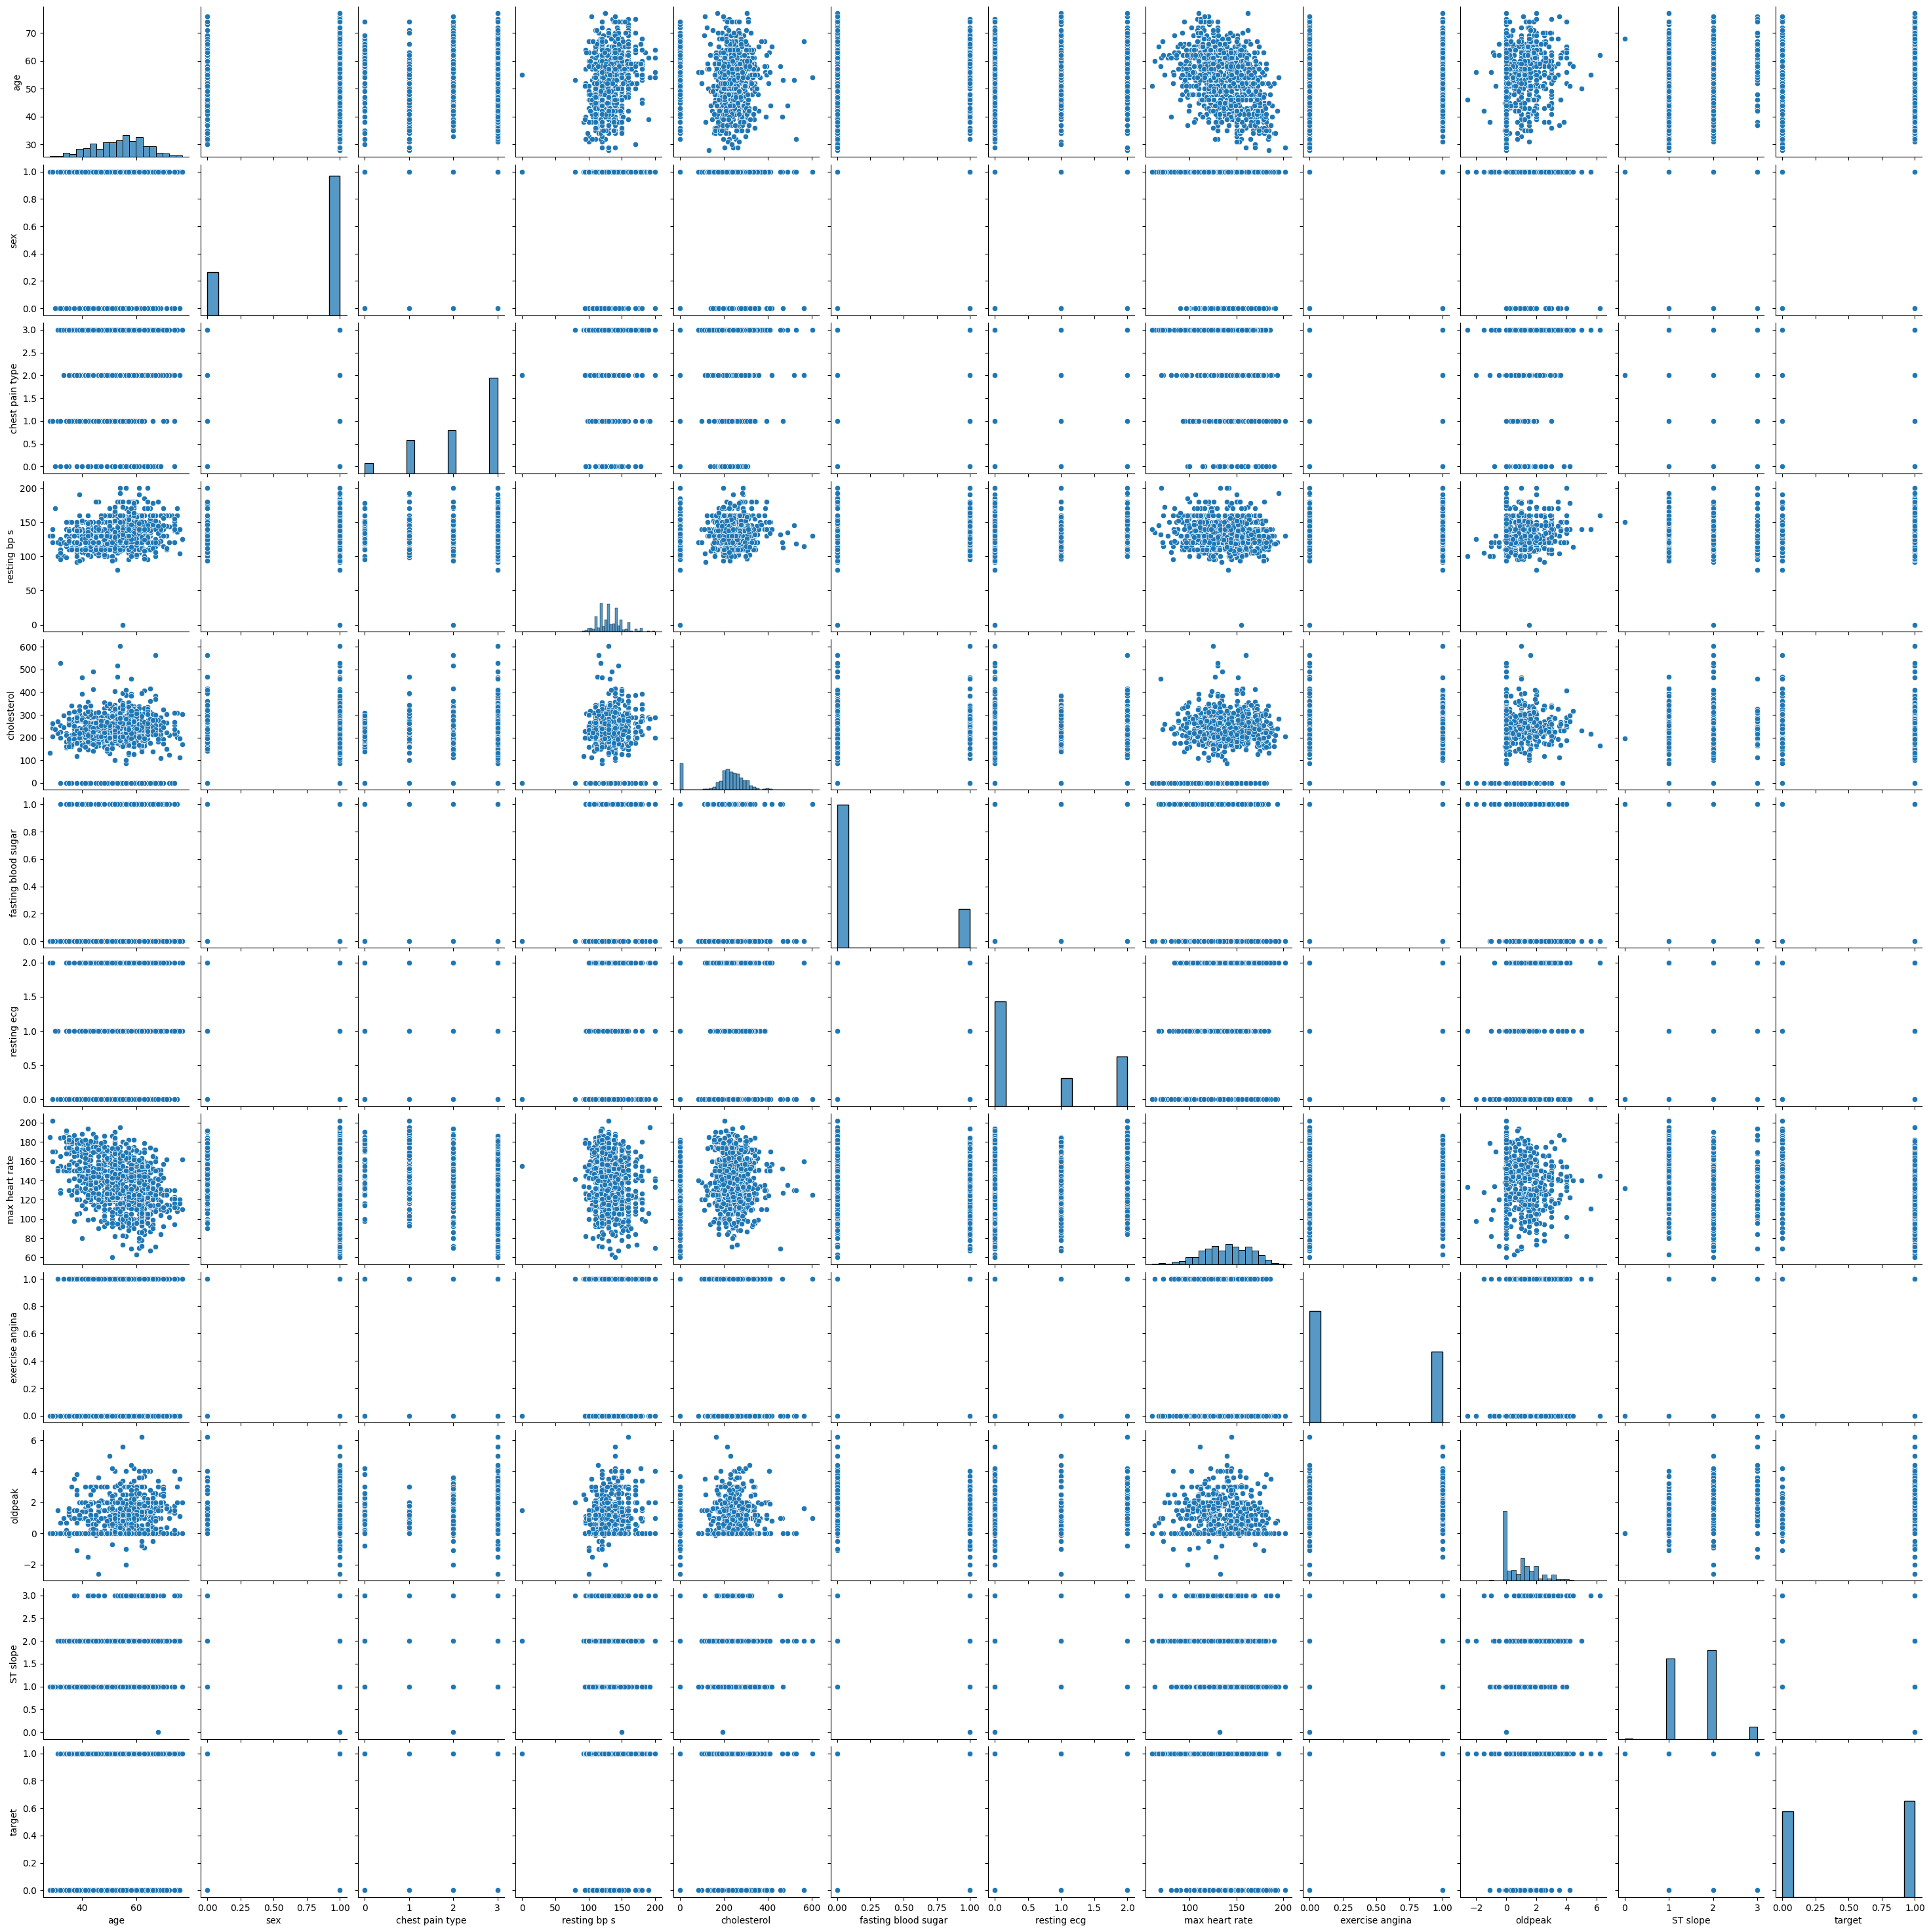

Correlation Heatmap EDA


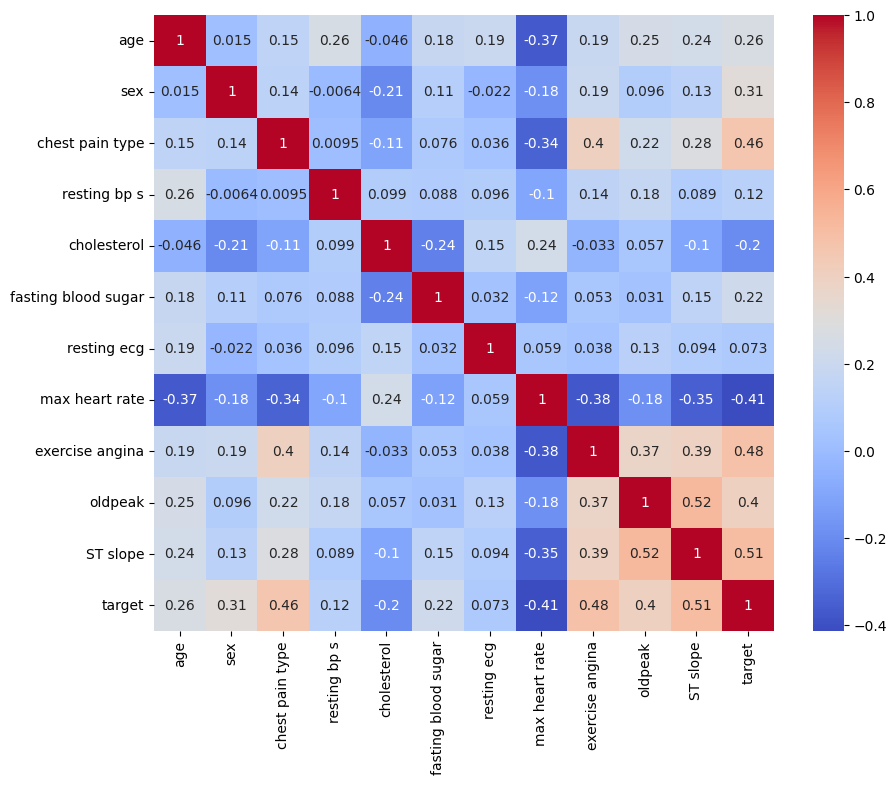

In [ ]:
print("Performing Pairplot EDA")
sns.pairplot(df)
plt.show()

print("Correlation Heatmap EDA")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with Target Variable:")
print(correlation_with_target)


Correlation with Target Variable:
target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64


<ipython-input-18-0a13c57b307f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


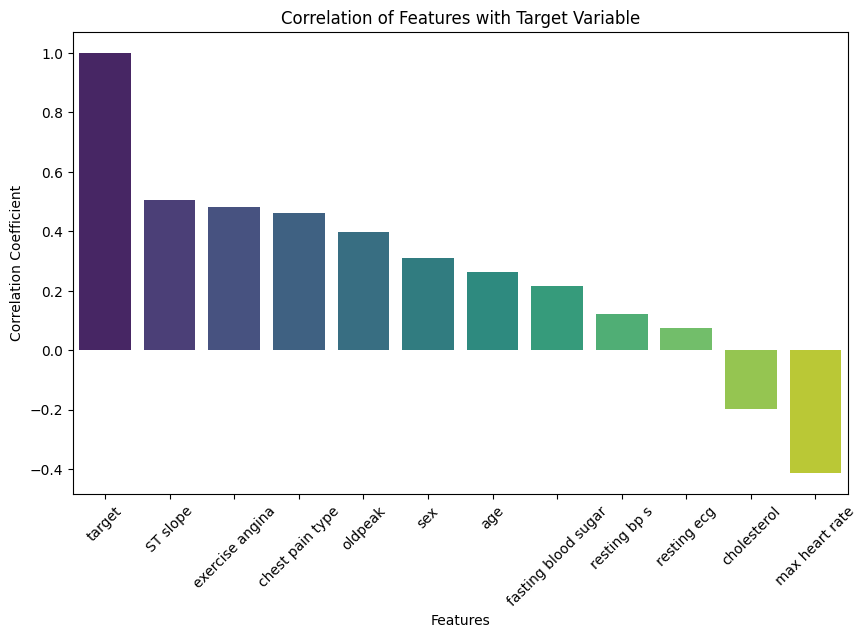

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


Density Plot for age


<ipython-input-19-f1a59861975e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


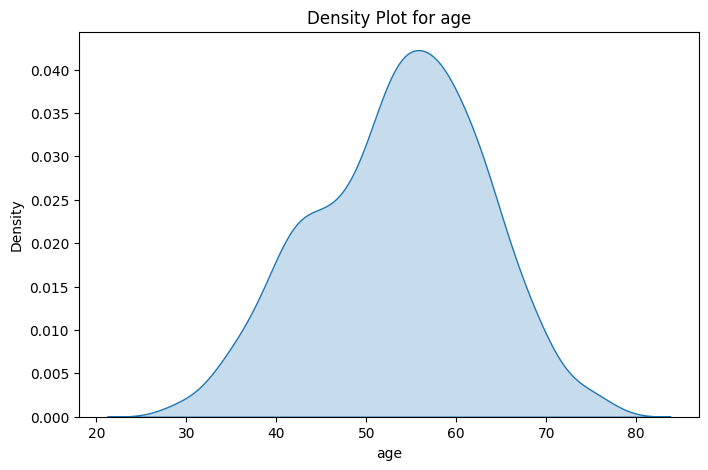

Density Plot for resting bp s


<ipython-input-19-f1a59861975e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


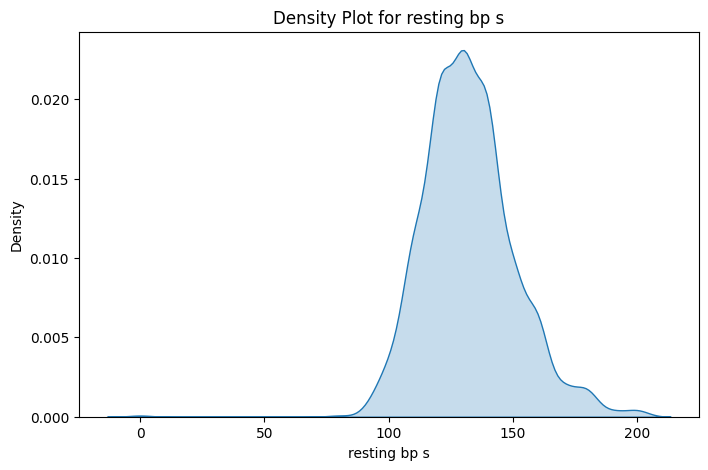

Density Plot for cholesterol


<ipython-input-19-f1a59861975e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


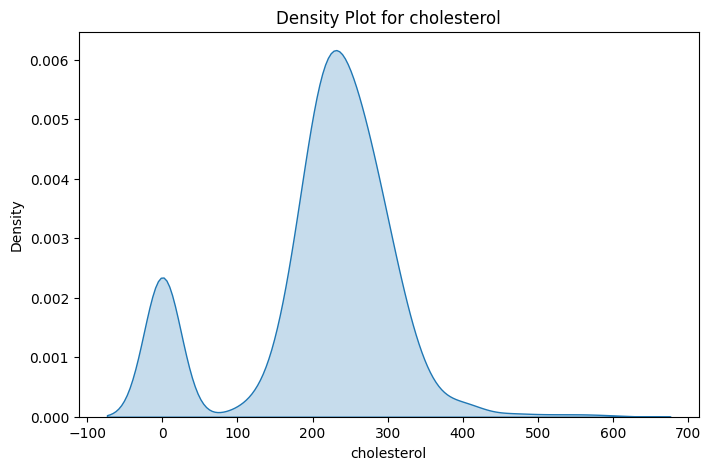

Density Plot for max heart rate


<ipython-input-19-f1a59861975e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


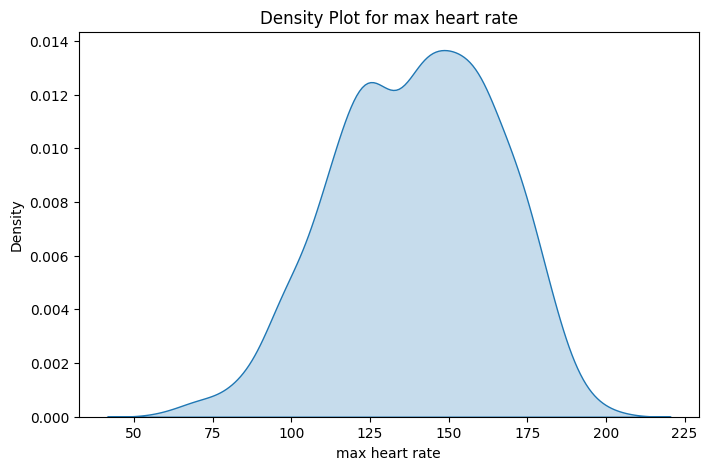

Density Plot for oldpeak


<ipython-input-19-f1a59861975e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


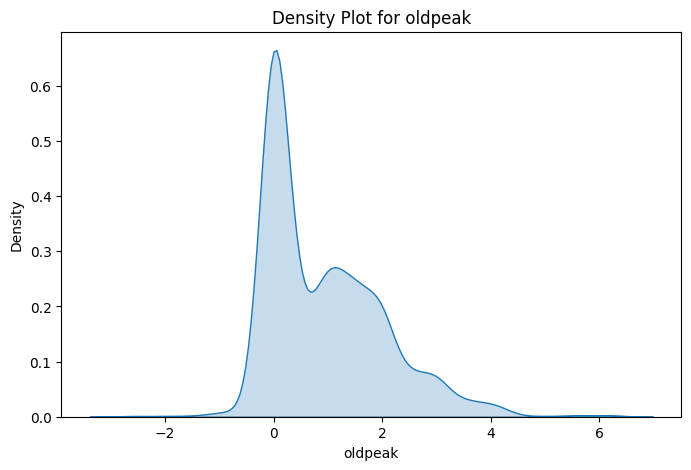

In [ ]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
for feature in numerical_features:
    print(f"Density Plot for {feature}")
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Density Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


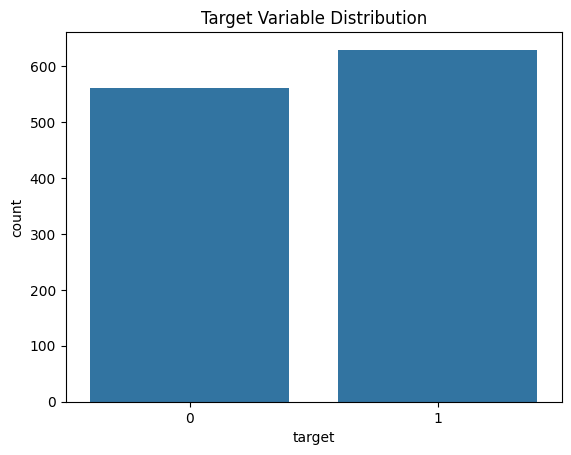

Class Imbalance: 
target
1    629
0    561
Name: count, dtype: int64


In [ ]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()

class_counts = df['target'].value_counts()
print(f"Class Imbalance: \n{class_counts}")


In [ ]:
print("Calculating Correlation for Two-Variable Combinations")
pairs = [
    ('age', 'resting bp s'),
    ('age', 'cholesterol'),
    ('age', 'max heart rate'),
    ('age', 'oldpeak'),
    ('resting bp s', 'cholesterol'),
    ('resting bp s', 'max heart rate'),
    ('resting bp s', 'oldpeak'),
    ('cholesterol', 'max heart rate'),
    ('cholesterol', 'oldpeak'),
    ('max heart rate', 'oldpeak')
]

correlation_results = []
for var1, var2 in pairs:
    correlation_value = df[var1].corr(df[var2])
    correlation_results.append((f"{var1} * {var2}", correlation_value))

correlation_df = pd.DataFrame(correlation_results, columns=['Variable Pair', 'Correlation Value'])

correlation_df_sorted = correlation_df.sort_values(by='Correlation Value', ascending=False)

print("Correlation Values for Two-Variable Combinations (Highest to Lowest):")
print(correlation_df_sorted)


Calculating Correlation for Two-Variable Combinations
Correlation Values for Two-Variable Combinations (Highest to Lowest):
                   Variable Pair  Correlation Value
0             age * resting bp s           0.257692
3                  age * oldpeak           0.245093
7   cholesterol * max heart rate           0.238028
6         resting bp s * oldpeak           0.176111
4     resting bp s * cholesterol           0.099037
8          cholesterol * oldpeak           0.057451
1              age * cholesterol          -0.046472
5  resting bp s * max heart rate          -0.101357
9       max heart rate * oldpeak          -0.183688
2           age * max heart rate          -0.368676


Creating Scatter Plots for Each Pair
Creating scatter plot for age and resting bp s


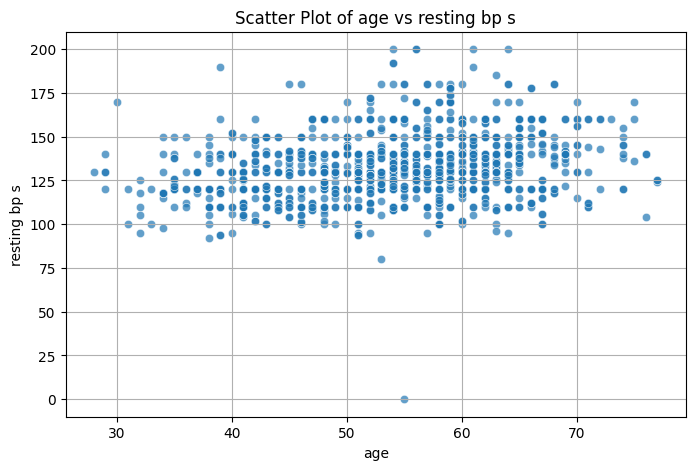

Creating scatter plot for age and cholesterol


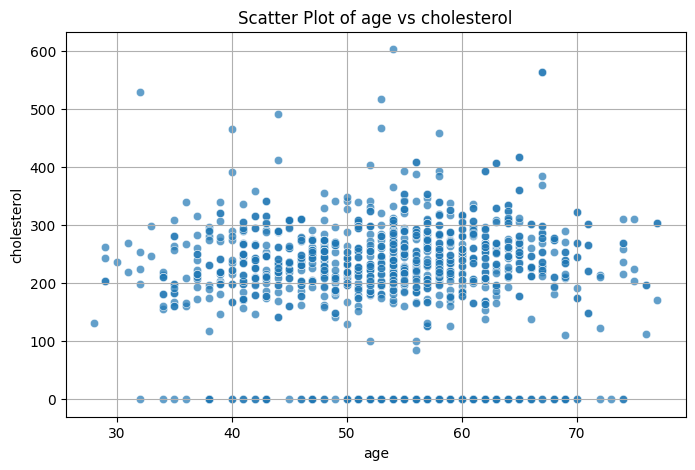

Creating scatter plot for age and max heart rate


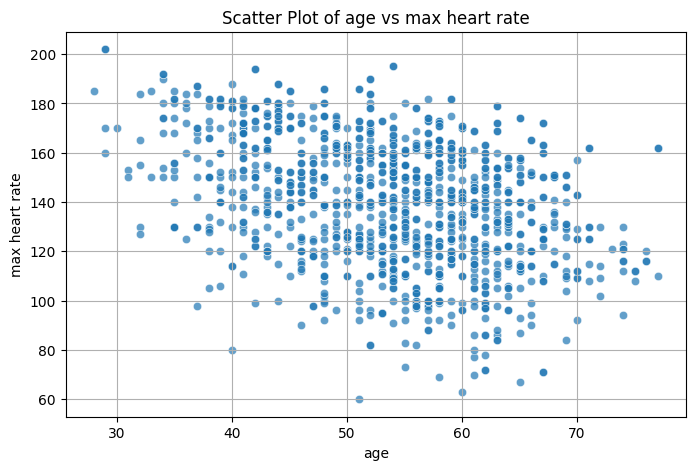

Creating scatter plot for age and oldpeak


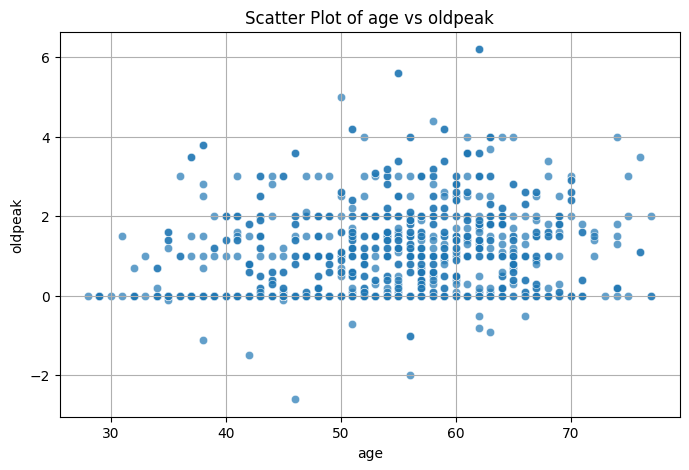

Creating scatter plot for resting bp s and cholesterol


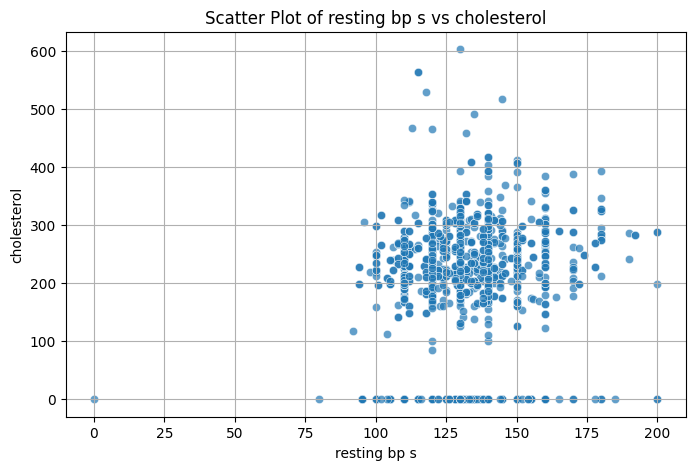

Creating scatter plot for resting bp s and max heart rate


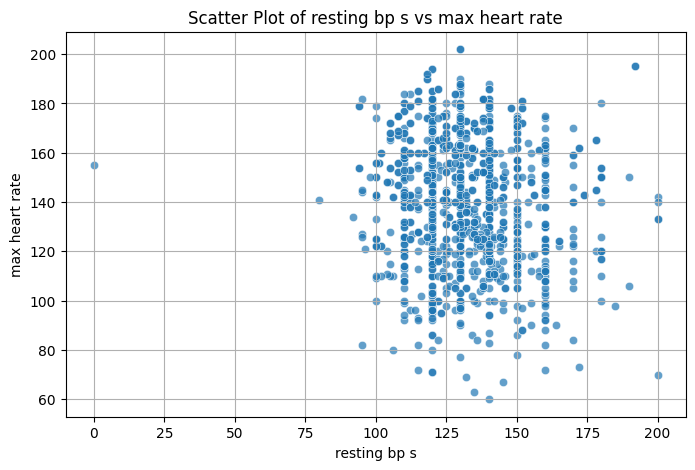

Creating scatter plot for resting bp s and oldpeak


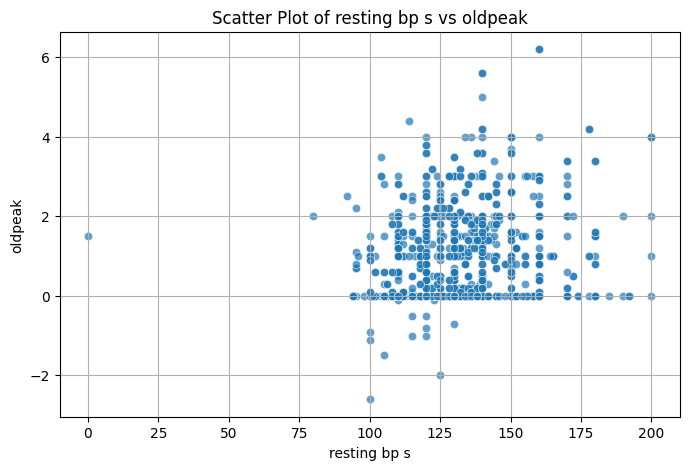

Creating scatter plot for cholesterol and max heart rate


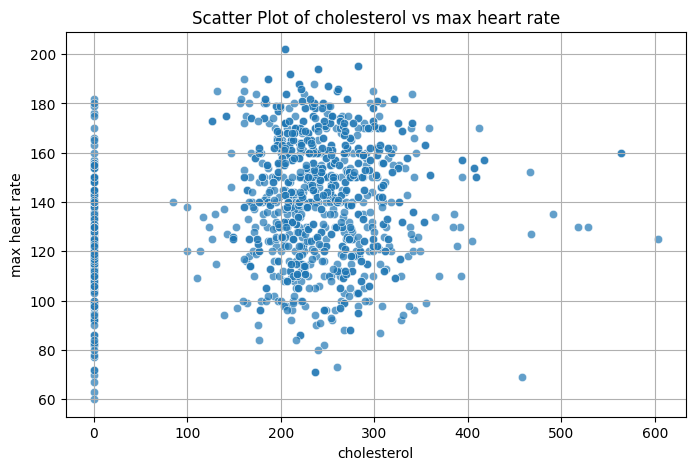

Creating scatter plot for cholesterol and oldpeak


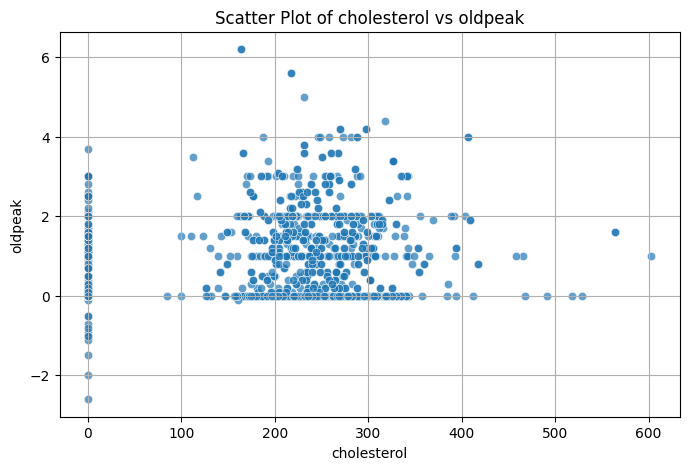

Creating scatter plot for max heart rate and oldpeak


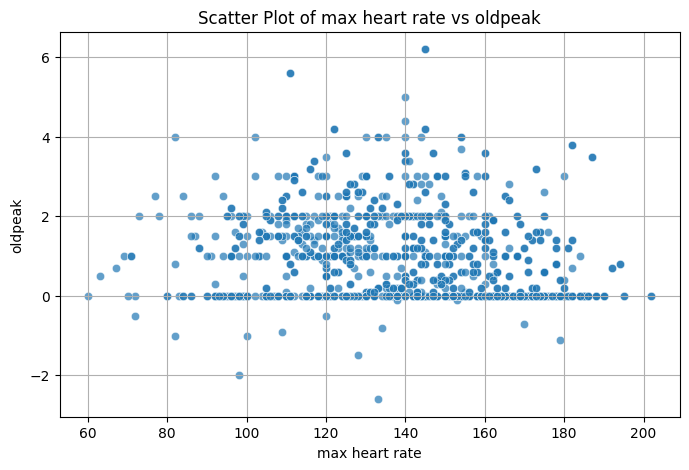

In [ ]:
print("Creating Scatter Plots for Each Pair")
for var1, var2 in pairs:
    print(f"Creating scatter plot for {var1} and {var2}")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=var1, y=var2, alpha=0.7)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()


In [ ]:
print("Performing Chi-Squared Test for Categorical Variables")
chi_squared_pairs = [
    ('sex', 'chest pain type'),
    ('sex', 'fasting blood sugar'),
    ('sex', 'resting ecg'),
    ('sex', 'exercise angina'),
    ('sex', 'ST slope'),
    ('chest pain type', 'fasting blood sugar'),
    ('chest pain type', 'resting ecg'),
    ('chest pain type', 'exercise angina'),
    ('chest pain type', 'ST slope'),
    ('fasting blood sugar', 'resting ecg'),
    ('fasting blood sugar', 'exercise angina'),
    ('fasting blood sugar', 'ST slope'),
    ('resting ecg', 'exercise angina'),
    ('resting ecg', 'ST slope'),
    ('exercise angina', 'ST slope')
]

print("Chi-Squared Test Results:")
for var1, var2 in chi_squared_pairs:
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Squared Test for {var1} and {var2}:")
    print(f"Chi2 Statistic: {chi2:.4f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")
    if p < 0.05:
        print("   -> Significant relationship (p < 0.05).")
    else:
        print("   -> No significant relationship (p >= 0.05).")


Performing Chi-Squared Test for Categorical Variables
Chi-Squared Test Results:

Chi-Squared Test for sex and chest pain type:
Chi2 Statistic: 40.1110, P-value: 0.0000, Degrees of Freedom: 3
   -> Significant relationship (p < 0.05).

Chi-Squared Test for sex and fasting blood sugar:
Chi2 Statistic: 14.0211, P-value: 0.0002, Degrees of Freedom: 1
   -> Significant relationship (p < 0.05).

Chi-Squared Test for sex and resting ecg:
Chi2 Statistic: 7.1510, P-value: 0.0280, Degrees of Freedom: 2
   -> Significant relationship (p < 0.05).

Chi-Squared Test for sex and exercise angina:
Chi2 Statistic: 44.0280, P-value: 0.0000, Degrees of Freedom: 1
   -> Significant relationship (p < 0.05).

Chi-Squared Test for sex and ST slope:
Chi2 Statistic: 21.2805, P-value: 0.0001, Degrees of Freedom: 3
   -> Significant relationship (p < 0.05).

Chi-Squared Test for chest pain type and fasting blood sugar:
Chi2 Statistic: 19.0197, P-value: 0.0003, Degrees of Freedom: 3
   -> Significant relationship 

In [ ]:
print("Feature Engineering - Creating New Features")

df['age_resting_bp'] = df['age'] * df['resting bp s']
df['age_oldpeak'] = df['age'] * df['oldpeak']
df['cholesterol_max_heart_rate'] = df['cholesterol'] * df['max heart rate']
df['resting_bp_oldpeak'] = df['resting bp s'] * df['oldpeak']

df['sex_chest_pain_type'] = df['sex'] * df['chest pain type']
df['sex_fasting_blood_sugar'] = df['sex'] * df['fasting blood sugar']
df['sex_resting_ecg'] = df['sex'] * df['resting ecg']
df['sex_exercise_angina'] = df['sex'] * df['exercise angina']
df['sex_st_slope'] = df['sex'] * df['ST slope']

df['chest_pain_type_fasting_blood_sugar'] = df['chest pain type'] * df['fasting blood sugar']
df['chest_pain_type_resting_ecg'] = df['chest pain type'] * df['resting ecg']
df['chest_pain_type_exercise_angina'] = df['chest pain type'] * df['exercise angina']
df['chest_pain_type_st_slope'] = df['chest pain type'] * df['ST slope']

df['fasting_blood_sugar_resting_ecg'] = df['fasting blood sugar'] * df['resting ecg']
df['fasting_blood_sugar_st_slope'] = df['fasting blood sugar'] * df['ST slope']

df['resting_ecg_exercise_angina'] = df['resting ecg'] * df['exercise angina']
df['resting_ecg_st_slope'] = df['resting ecg'] * df['ST slope']
df['exercise_angina_st_slope'] = df['exercise angina'] * df['ST slope']

print("New Features Created:")
print(df.head())


Feature Engineering - Creating New Features
New Features Created:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                1           140          289                    0   
1   49    0                2           160          180                    0   
2   37    1                1           130          283                    0   
3   48    0                3           138          214                    0   
4   54    1                2           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ...  sex_st_slope  \
0            0             172                0      0.0  ...             1   
1            0             156                0      1.0  ...             0   
2            1              98                0      0.0  ...             1   
3            0             108                1      1.5  ...             0   
4            0             122                0      0.0  

In [ ]:
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'age_resting_bp', 'age_oldpeak', 'cholesterol_max_heart_rate', 'resting_bp_oldpeak']

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Feature Scaling Applied:")
print(df[numerical_columns].head())

Feature Scaling Applied:
        age  resting bp s  cholesterol  max heart rate   oldpeak  \
0 -1.466728      0.427328     0.775674        1.265039 -0.849792   
1 -0.504600      1.516587    -0.299512        0.637758  0.071119   
2 -1.787437     -0.117301     0.716489       -1.636136 -0.849792   
3 -0.611503      0.318402     0.035867       -1.244085  0.531575   
4  0.029915      0.971958    -0.151550       -0.695214 -0.849792   

   age_resting_bp  age_oldpeak  cholesterol_max_heart_rate  resting_bp_oldpeak  
0       -0.868272    -0.828968                    1.275478           -0.817906  
1        0.391737    -0.048742                   -0.124987            0.225181  
2       -1.312650    -0.828968                   -0.147391           -0.817906  
3       -0.292268     0.317487                   -0.446677            0.531588  
4        0.537988    -0.828968                   -0.402775           -0.817906  


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

print("Step 20: Performing Train-Test Split (70-30%)")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Step 20: Performing Train-Test Split (70-30%)
Training Set Shape: (833, 29)
Testing Set Shape: (357, 29)


In [ ]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")


Original number of features: 29
Reduced number of features after PCA: 10


In [ ]:
import time

models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'LightGBM': (LGBMClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'CatBoost': (CatBoostClassifier(silent=True), {'iterations': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
    'MLP': (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(10,), (20,), (30,)], 'activation': ['tanh', 'relu']})
}

best_models = {}
run_times = {}

for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()

    search = RandomizedSearchCV(model, params, n_iter=10, cv=5, verbose=0, random_state=42)
    search.fit(X_train_pca, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    best_models[model_name] = search.best_estimator_
    run_times[model_name] = elapsed_time

    print(f"Best Parameters for {model_name}: {search.best_params_}")
    print(f"Run Time for {model_name}: {elapsed_time:.2f} seconds")

print("\nModel Training Run Times (in seconds):")
for model_name, run_time in run_times.items():
    print(f"{model_name}: {run_time:.2f} seconds")


Training RandomForest...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for RandomForest: {'n_estimators': 50, 'max_depth': 30}
Run Time for RandomForest: 20.91 seconds
Training GradientBoosting...
Best Parameters for GradientBoosting: {'n_estimators': 100, 'learning_rate': 0.2}
Run Time for GradientBoosting: 10.76 seconds
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:51:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:51:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:51:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:51:42] WARNING: /workspace/src/learner.cc:740: 
Para

Best Parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.1}
Run Time for XGBoost: 3.22 seconds
Training LightGBM...
[LightGBM] [Info] Number of positive: 340, number of negative: 326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 666, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510511 -> initscore=0.042048
[LightGBM] [Info] Start training from score 0.042048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 100}
Run Time for CatBoost: 4.51 seconds
Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for SVM: {'gamma': 'auto', 'C': 1}
Run Time for SVM: 3.88 seconds
Training MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perc

Best Parameters for MLP: {'hidden_layer_sizes': (20,), 'activation': 'relu'}
Run Time for MLP: 35.98 seconds

Model Training Run Times (in seconds):
RandomForest: 20.91 seconds
GradientBoosting: 10.76 seconds
XGBoost: 3.22 seconds
LightGBM: 2.02 seconds
CatBoost: 4.51 seconds
SVM: 3.88 seconds
MLP: 35.98 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import time

voting_clf = VotingClassifier(estimators=[
    ('rf', best_models['RandomForest']),
    ('gb', best_models['GradientBoosting']),
    ('xgb', best_models['XGBoost']),
    ('lgbm', best_models['LightGBM']),
    ('cat', best_models['CatBoost']),
    ('svm', best_models['SVM']),
    ('mlp', best_models['MLP'])
], voting='soft')

start_time = time.time()

voting_clf.fit(X_train_pca, y_train)
end_time = time.time()
voting_clf_time = end_time - start_time
print(f"Voting Classifier Training Run Time: {voting_clf_time:.2f} seconds")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:52:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 426, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511405 -> initscore=0.045626
[LightGBM] [Info] Start training from score 0.045626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Voting Classifier Training Run Time: 4.03 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9244
Precision: 0.9356
Recall: 0.9310
F1 Score: 0.9333


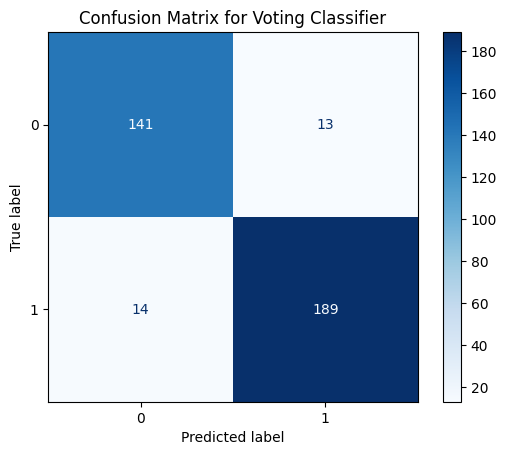

In [ ]:
y_pred_voting = voting_clf.predict(X_test_pca)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

print(f"Accuracy: {accuracy_voting:.4f}")
print(f"Precision: {precision_voting:.4f}")
print(f"Recall: {recall_voting:.4f}")
print(f"F1 Score: {f1_voting:.4f}")

cm_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=[0, 1])  # Assuming binary classification
disp_voting.plot(cmap='Blues')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()



RandomForest Model Performance:
Accuracy: 0.9272
Precision: 0.9317
Recall: 0.9409
F1 Score: 0.9363


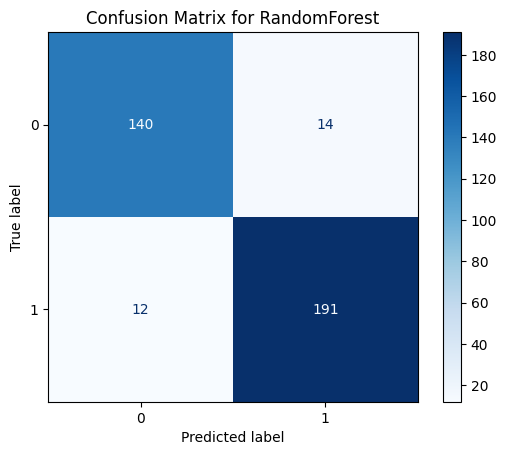


GradientBoosting Model Performance:
Accuracy: 0.9104
Precision: 0.9340
Recall: 0.9064
F1 Score: 0.9200


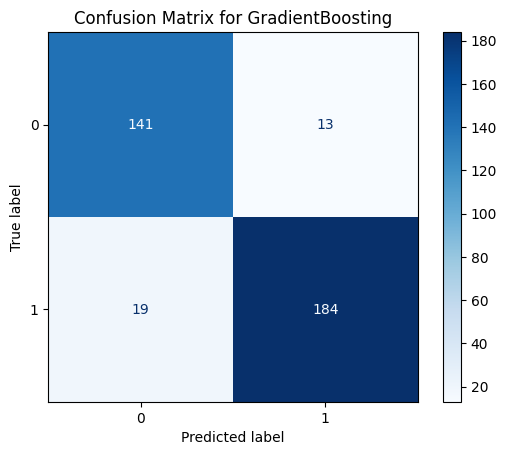


XGBoost Model Performance:
Accuracy: 0.9216
Precision: 0.9397
Recall: 0.9212
F1 Score: 0.9303


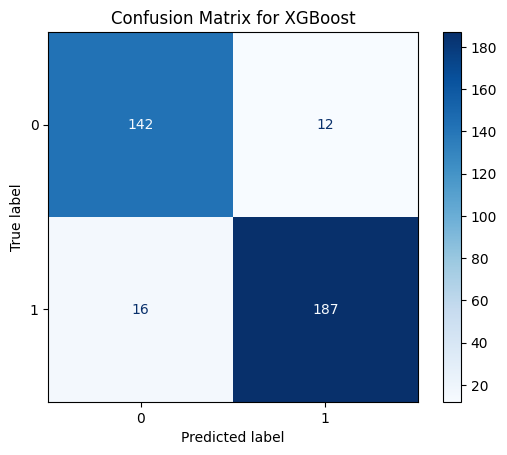


LightGBM Model Performance:
Accuracy: 0.9188
Precision: 0.9439
Recall: 0.9113
F1 Score: 0.9273


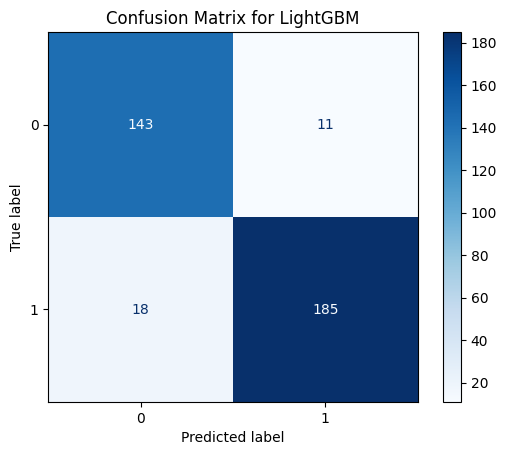


CatBoost Model Performance:
Accuracy: 0.8824
Precision: 0.8927
Recall: 0.9015
F1 Score: 0.8971


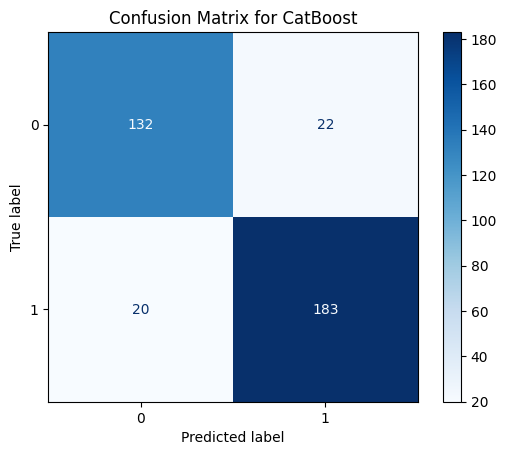


SVM Model Performance:
Accuracy: 0.8908
Precision: 0.8832
Recall: 0.9310
F1 Score: 0.9065


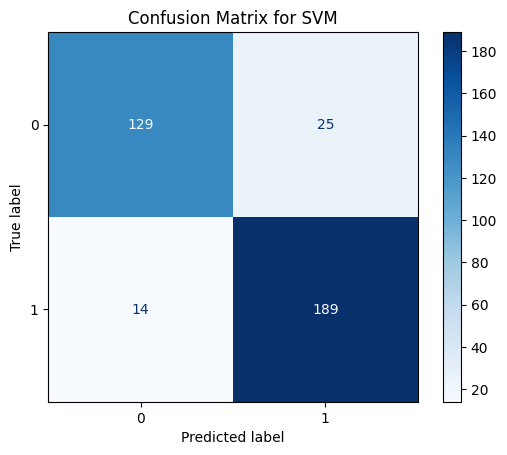


MLP Model Performance:
Accuracy: 0.8796
Precision: 0.8883
Recall: 0.9015
F1 Score: 0.8949


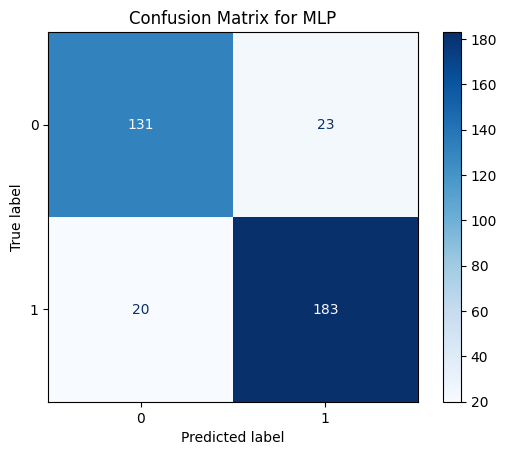

In [ ]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Assuming binary classification
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


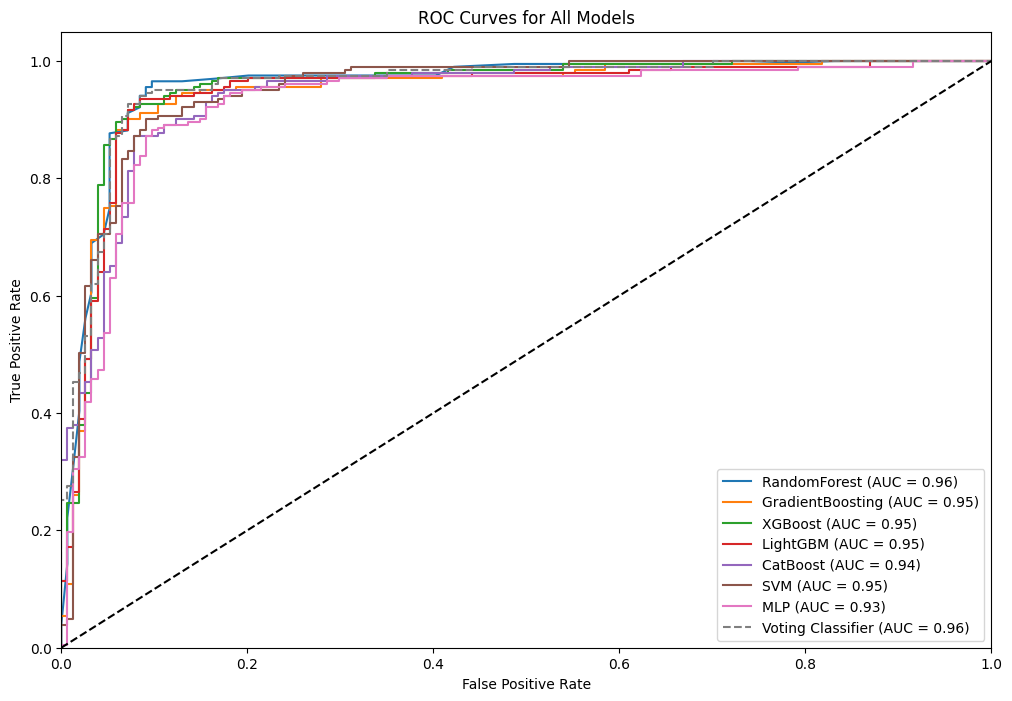

In [ ]:
plt.figure(figsize=(12, 8))

for model_name, model in best_models.items():
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')

y_pred_prob_voting = voting_clf.predict_proba(X_test_pca)[:, 1]
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_prob_voting)
auc_value_voting = auc(fpr_voting, tpr_voting)
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {auc_value_voting:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()
